# Goal: To predict the cost of living index for a city based on other factors
# Question: Can we find the cost of living index of a new city based on rent index,Groceries Index , Restaurant price Index, Local Purchasing Power index of that particular city

In [2]:
#Importing the required libraries
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
sns.set()

In [3]:
# Reading the CSV File
path='C:/Users/Jewin/Desktop/Jovita-DataSciene/DATA/cost-of-living-2018.csv'

data=pd.read_csv(path)

# EDA

In [4]:
data.head(10)

,Rank,City,Rent Index,Cost of Living Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Hamilton, Bermuda",110.87,128.76,143.47,158.75,112.26
1,NaN,"Zurich, Switzerland",66.14,105.03,149.86,135.76,142.70
2,NaN,"Geneva, Switzerland",71.70,104.38,138.98,129.74,130.96
3,NaN,"Basel, Switzerland",49.68,91.61,127.54,127.22,139.01
4,NaN,"Bern, Switzerland",43.57,87.30,132.70,119.48,112.71
5,NaN,"Lausanne, Switzerland",52.32,91.24,126.59,132.12,127.95
6,NaN,"Reykjavik, Iceland",57.25,91.70,118.15,133.19,88.95
7,NaN,"Stavanger, Norway",39.83,80.61,106.09,143.54,118.14
8,NaN,"Lugano, Switzerland",52.91,86.73,117.74,122.30,119.86
9,NaN,"Oslo, Norway",49.28,84.46,112.42,124.09,102.94


In [5]:
data.shape

(540, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 7 columns):
Rank                            0 non-null float64
City                            540 non-null object
Rent Index                      540 non-null float64
Cost of Living Index            540 non-null float64
Groceries Index                 540 non-null float64
Restaurant Price Index          540 non-null float64
Local Purchasing Power Index    540 non-null float64
dtypes: float64(6), object(1)
memory usage: 29.7+ KB


In [7]:
data.isnull().sum()

Rank                            540
City                              0
Rent Index                        0
Cost of Living Index              0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [8]:
#Dropping the columns Rank because it has all null values, and city which is categorical and not really useful for the analysis.
data=data.drop(columns=['Rank','City'])

In [9]:
# getting to know the correlation between each variable
data.corr()

,Rent Index,Cost of Living Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rent Index,1.000000,0.928384,0.778893,0.758411,0.568749
Cost of Living Index,0.928384,1.000000,0.924514,0.915006,0.641057
Groceries Index,0.778893,0.924514,1.000000,0.845905,0.635767
Restaurant Price Index,0.758411,0.915006,0.845905,1.000000,0.652148
Local Purchasing Power Index,0.568749,0.641057,0.635767,0.652148,1.000000


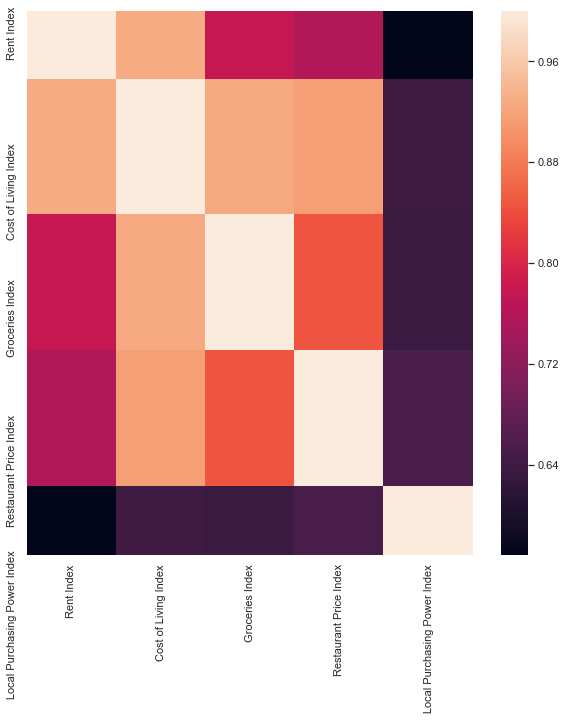

In [10]:
# Plotting the heat map to get the pictorial representation of the degree of correlation.
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

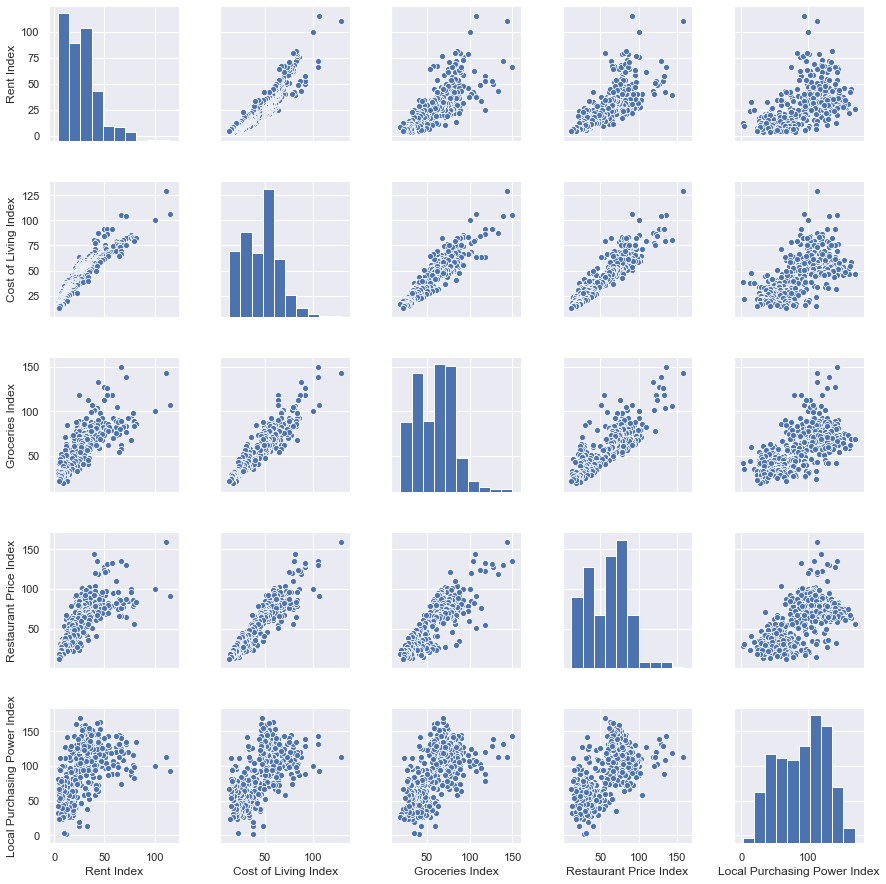

In [11]:
#Representing data in pair plots to understand the correlation between features
sns.pairplot(data)

In [12]:
#Re used the fuction used in one of the labs, to show that coeffecients of diffrent models, its been used later in the notebook.

def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

## From the below function , we can figure out that Local Purchasing Power Index is weekly correlated and below 3 features were strongly corelated with cost of living index.
Restaurant Price Index,
Groceries Index ,
Rent Index

In [13]:
data.corr()['Cost of Living Index'].sort_values()

Local Purchasing Power Index    0.641057
Restaurant Price Index          0.915006
Groceries Index                 0.924514
Rent Index                      0.928384
Cost of Living Index            1.000000
Name: Cost of Living Index, dtype: float64

# Predictor variables

In [14]:
Predictor_columns=['Restaurant Price Index','Groceries Index','Rent Index']
X=data[Predictor_columns]
X.head()

,Restaurant Price Index,Groceries Index,Rent Index
0,158.75,143.47,110.87
1,135.76,149.86,66.14
2,129.74,138.98,71.70
3,127.22,127.54,49.68
4,119.48,132.70,43.57


# Model selection and Evaluation

## Splitting data into 3 sets , Train,Validate and Test

In [15]:
y=data['Cost of Living Index']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_eval, y_train, y_eval = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

## 20 % Test data will be used only at the end to make final conclusions on the models used.

In [ ]:
#Using Liner Regression function to fit the training data and getting the score for evaluation set

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9875045663810247

In [17]:
lr.score(X_eval, y_eval)

0.9897032327757149

## Train score and Evaluation score os almost the same and represents a good linear regression model. 

# Forward Feature Selection

In [18]:
#The code for Forward selection is been used from the labs

## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [19]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature Rent Index with R^2 = 0.862 and adjusted R^2 = 0.860
Added feature Groceries Index with R^2 = 0.961 and adjusted R^2 = 0.960
Added feature Restaurant Price Index with R^2 = 0.988 and adjusted R^2 = 0.987
**************************************************

Resulting features:
Rent Index, Groceries Index, Restaurant Price Index


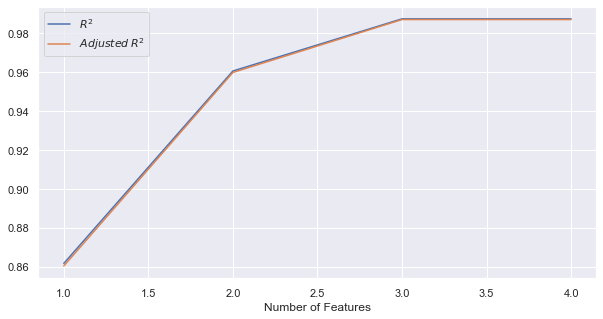

In [20]:

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

## Using Ridge and Ridge CV model to evaluate the liner regression model.

In [21]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-10,10,400)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))

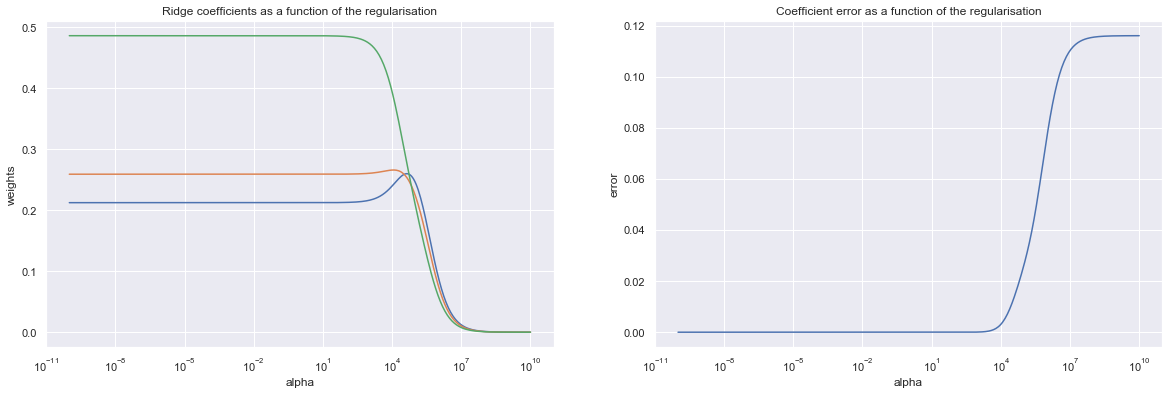

In [22]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

## Below code gives us the optimal value for alpha and the score for Ridge model.

In [23]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_training, y_training)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_training, y_training))

Alpha: 7.984645497739078e-10
Score: 0.9883837696252676


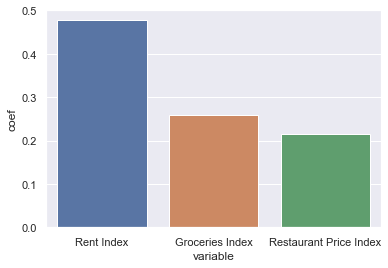

In [25]:
# Below graph shows that co effecients against each feature and its eveident that Rent Index has higher value compared to the other 2
view_coeff(X_training, optimal_ridge)

## Using Lasso and Lasso CV model to evaluate the liner regression model.

In [26]:

# create a model object to hold the modelling parameters
clf = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 20)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))

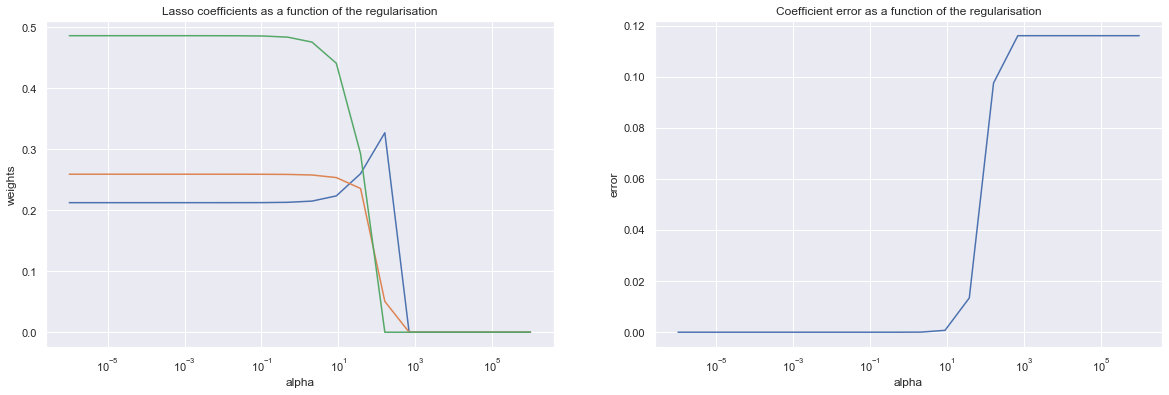

In [27]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

## Below code gives us the optimal value for alpha and the score for Ridge model.

In [28]:
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X_training, y_training)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_training, y_training))

Alpha: 0.0003359818286283781
Score: 0.9883837696196847


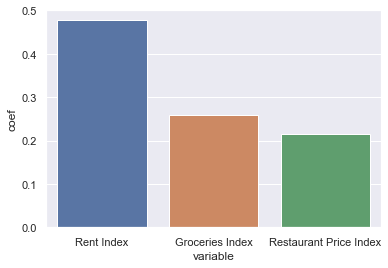

In [29]:
#Below graph shows that co effecients against each feature and its eveident that Rent Index has higher value compared to the other 2
view_coeff(X_training, optimal_lasso)

# Using the test data to find the score for all the 3 Models 

In [30]:
print(lr.score(X_test, y_test))
print(optimal_ridge.score(X_test, y_test))
print(optimal_lasso.score(X_test, y_test))


0.9936288502626672
0.9936199302059371
0.9936199214084406


# Answer : Cost of living index for a city could be determined by following 3 factors
# 1 Rent Index
# 2 Groceries Index
# 3 Restaurant Price Index

In [32]:
#Predicting the cost of living index

#'Restaurant Price Index','Groceries Index','Rent Index'

x = [[80,100,120]]
Ypred = lr.predict(x)
print('Predicted Cost of living: ', Ypred[0])

Predicted Cost of living:  106.15777900611727
